<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/jupyter_notebooks/bootcamp_01_aula_01_a_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/header_bootcamp.png'>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/icones_readme.png'>

# Analisando dados da saúde com Python e Pandas

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/hospitais.png'>



PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL
<p>A base principal deste estudo foi extraído site do DATASUS, e registram os valores gastos nos hospitais por UF</p>

# Aula 01

## Importando a biblioteca pandas e dando um aliás "pd"

In [1]:
import pandas as pd

> Para carregar o arquivo extraído do site do Datasus é necessário verificar o encode [encoding] , linhas no cabeçalho [skiprows] e rodapé [skipfooter] que deverão ser ignoradas, o delimitador [delimiter] a ser utilizado, separador dos milhares [thousands] e decimais [decimal] do arquivo. Estes parâmetros precisam ser informados na função pd.read_csv

In [2]:
# Procedimentos hospitalares do SUS - por local de internação - Brasil
# Valor total por Unidade da Federação e Ano/mês processamento
# Período:Jan/2008-Ago/2020
arquivo_texto_01 = 'https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/A151346189_28_143_208.csv'


# Procedimentos hospitalares do SUS - por local de internação - Brasil
# Valor total por Unidade da Federação e Ano/mês atendimento
# Período:Jan/2008-Ago/2020
arquivo_texto_02 = 'https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/A160324189_28_143_208.csv'

> Dois arquivos foram extraídos do site do Datasus e estão hospedados no github. No código acima vamos guardar as urls em duas variáveis.

In [3]:
datasus_01 = pd.read_csv(arquivo_texto_02, delimiter=';', skiprows=3, skipfooter=10, thousands='.', decimal=',')
datasus_01.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Substituindo os campos com '-' por valores nulos.
<p> Foi necessário converter as colunas numérias após o replace para que cada coluna se comportasse como float, independente se possuia ou não valores nulos.

In [4]:
datasus_02 = datasus_01.replace('-', float('Nan'))
colunas_numericas = datasus_02.columns[1:]
datasus_02[colunas_numericas] = datasus_02[colunas_numericas].astype(float)
datasus_02.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,NaN,4.206680e+08
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


## Informações sobre o Data Frame criado:

In [5]:
datasus_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


> O Data Frame possui 27 linhas e 280 colunas.

## Calculando a média
<p>As colunas que apresentam valores vazios (representados por "-") não teriam a média calculada.</p>
<p>Se forçássemos o cálculo de uma coluna que apresenta valores que não podem ser convertidos para números, seria apresentado um erro.</p>

E por esse motivo todas as colunas que tinham valores nulos foram convertidas para float. Assim é possível calcular a média dos valores preenchidos ignorando os valores nulos utilizando o parâmetro skipna da função df.mean(skipna=True).

In [6]:
datasus_02['2020/Ago'].mean(skipna=True)

19880851.11923077

## Alterando a visualização dos resultados para 2 casas decimais

In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
datasus_02.mean()

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 279, dtype: float64

## Série do mês jan/2008 por uf
<p>É possível visualizar somente uma coluna selecionando-a</p>
Ao selecionar uma coluna de um Data Frame essa coluna é chamada de Serie.

In [9]:
datasus_01['2008/Jan']

0       1829559.71
1       1731744.62
2      11419210.08
3        808448.39
4      21762104.16
5       1329876.61
6       5136474.61
7      21551600.33
8      11375419.37
9      32444328.54
10     11763899.23
11     16599004.84
12     51219113.60
13     16503978.22
14      5439985.99
15     73336297.08
16    205912743.65
17     16212109.41
18    250564959.99
19   1023564534.21
20     58081334.45
21     53034384.67
22     51064610.03
23      8301006.10
24      8213438.64
25     74063828.22
26     10561085.46
Name: 2008/Jan, dtype: float64

> Também é possível calcular a média de uma só coluna selecionada.

In [10]:
datasus_02['2008/Jan'].mean()

75697225.19296297

## Gráficos

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Desafio 1.01: escolher um título mais descritivo, que passe a mensagem adequada.

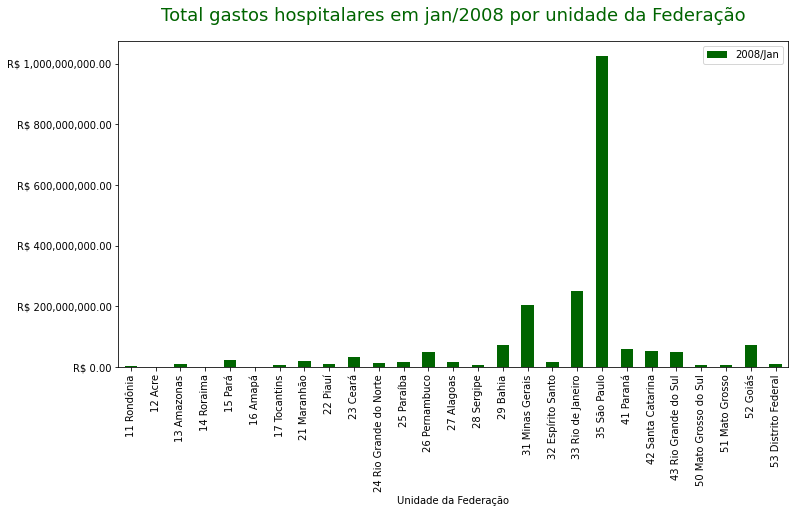

In [12]:
ax = datasus_02.plot(x='Unidade da Federação', y='2008/Jan', kind='bar', figsize=(12,6), color='darkgreen')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.title('Total gastos hospitalares em jan/2008 por unidade da Federação', fontsize=18, pad=20, color='darkgreen')

plt.show()

> Documentação: 
* https://matplotlib.org/3.3.2/gallery/ticks_and_spines/tick-formatters
* https://matplotlib.org/3.3.2/gallery/color/named_colors.html

## Desafio 1.02: Faça a mesma análise pro mês mais recente.

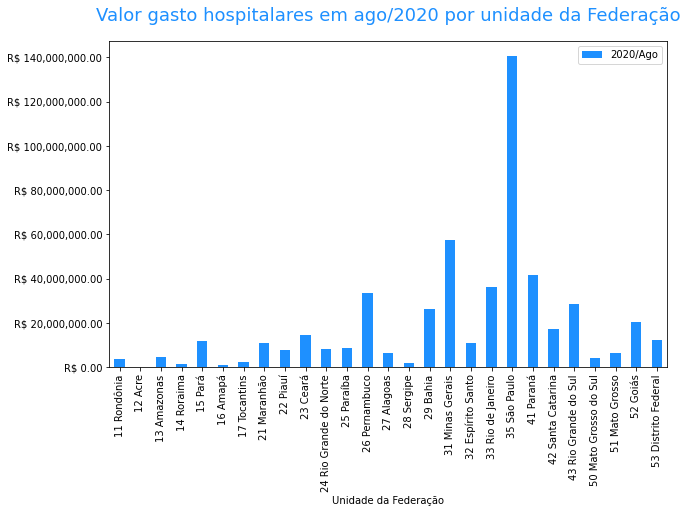

In [13]:
ax = datasus_02.plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(10,6), color='dodgerblue')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.title('Valor gasto hospitalares em ago/2020 por unidade da Federação', fontsize=18, pad=20, color='dodgerblue')

plt.show()

# Aula 02

## Trabalhando com duas colunas

> Podemos selecionar mais de uma coluna utilizando listas.

In [14]:
datasus_02[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


> Quando calculamos a média do Data Frame original, antes da conversão dos campos vazios, é possível perceber que as colunas que continham "dados vazios" não numéricos, as médias não são calculadas

In [15]:
datasus_01.mean()


2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [16]:
datasus_01.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [17]:
colunas_validas = datasus_01.mean().index.tolist() # Calcula a média, lista o indice das colunas válidas no cálculo e transfoma em uma lista.
colunas_validas.insert(0, 'Unidade da Federação') # Insere na primeira coluna a 'Unidade da Federação'

In [18]:
datasus_03 = datasus_01[colunas_validas]
datasus_03.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

### Alterando o índice do Data Frame e criando um novo Data Frame para análise

In [19]:
usaveis = datasus_03.set_index('Unidade da Federação')
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

### Listando os gastos de todas as UFs de um determinado mês

In [20]:
usaveis['2019/Ago']

Unidade da Federação
11 Rondônia                8909111.89
12 Acre                    2981072.98
13 Amazonas               16493719.52
14 Roraima                 3181321.82
15 Pará                   36462011.47
16 Amapá                   2173060.89
17 Tocantins               7140062.79
21 Maranhão               31374191.37
22 Piauí                  17816404.11
23 Ceará                  51672585.01
24 Rio Grande do Norte    23073307.72
25 Paraíba                19854699.54
26 Pernambuco             71735626.96
27 Alagoas                17668105.59
28 Sergipe                10075280.52
29 Bahia                  77852441.31
31 Minas Gerais          161707825.05
32 Espírito Santo         29298721.79
33 Rio de Janeiro         83311603.59
35 São Paulo             302367276.77
41 Paraná                127174095.05
42 Santa Catarina         64503540.72
43 Rio Grande do Sul      98546110.10
50 Mato Grosso do Sul     19217982.14
51 Mato Grosso            16532335.42
52 Goiás                  383

### Listando todos os gastos de uma UF

In [21]:
usaveis.loc['53 Distrito Federal']

2007/Ago       191951.47
2007/Set       769966.25
2007/Out      2165619.56
2007/Nov      3813256.48
2007/Dez      7121965.42
                ...     
2020/Abr     18123899.78
2020/Mai     21437430.22
2020/Jun     23479773.03
2020/Jul     22233542.26
Total      2429933198.76
Name: 53 Distrito Federal, Length: 157, dtype: float64

## Como transpor o Data Frame

Para transpor um Data Frame utilizamos o atribuo df.T



In [22]:
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,126330649.86,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,136867275.75,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,20219961.81,19666096.87,68145110.59,14278872.07,6705923.03,65159300.63,135977571.87,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,19593057.45,15491469.06,62325444.34,13087850.40,3312766.32,58898100.40,120467187.34,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,2477372149.60,2470550104.25,8046954289.39,2104405303.11,1130337049.71,9193802684.16,19160106499.88,3139189177.73,9696362872.68,38929353900.57,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657348958.66,2429933198.76


In [23]:
usaveis = usaveis.drop('Total', axis=1)

> Precisa excluir a coluna 'Total' para que o gráfico fique mais legível

In [24]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

## Desafio 2.01: Reposicionar a legenda do gráfico em uma posição mais adequada



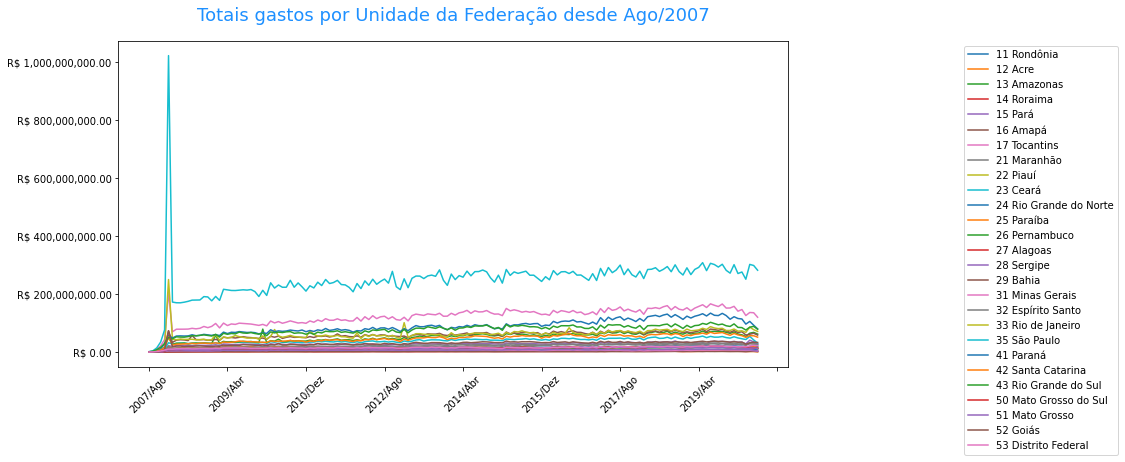

In [25]:
ax = usaveis.T.plot(figsize=(12,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Totais gastos por Unidade da Federação desde Ago/2007', fontsize=18, pad=20, color='dodgerblue')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=45)


plt.show()


> É possível transpor um conjunto selecionado de colunas

In [26]:
usaveis.T[['53 Distrito Federal', '35 São Paulo', '33 Rio de Janeiro', '31 Minas Gerais', '41 Paraná']]

Unidade da Federação,53 Distrito Federal,35 São Paulo,33 Rio de Janeiro,31 Minas Gerais,41 Paraná
2007/Ago,191951.47,1665349.90,469469.34,971394.37,554800.22
2007/Set,769966.25,4434168.64,921646.57,2861781.50,1431708.01
2007/Out,2165619.56,14577395.84,2994664.57,10018011.35,4630402.44
2007/Nov,3813256.48,35032259.98,7250528.08,21730281.63,11120030.79
2007/Dez,7121965.42,76668547.41,13627123.27,43429517.54,28790722.87
...,...,...,...,...,...
2020/Mar,19405446.88,276606288.92,73594497.93,147078556.29,114476997.52
2020/Abr,18123899.78,251696362.66,68160773.35,126330649.86,96727112.19
2020/Mai,21437430.22,302857660.98,86281033.16,136867275.75,106103737.62
2020/Jun,23479773.03,299060851.62,77604925.21,135977571.87,92901461.36


## Desafio 2.02: Plotar o gráfico de linha com apenas 5 estados de sua preferência



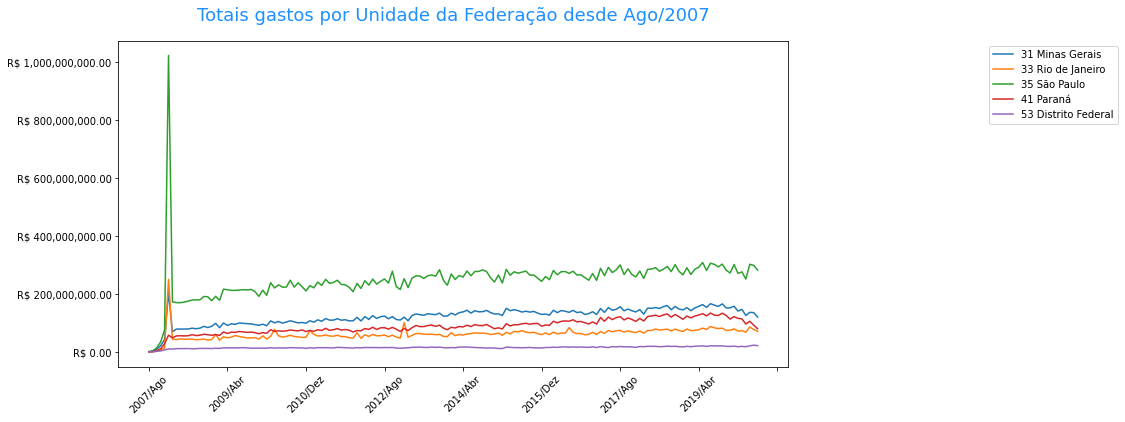

In [27]:
df = usaveis.T[['31 Minas Gerais', '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '53 Distrito Federal' ]]

ax = df.plot(figsize=(12,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Totais gastos por Unidade da Federação desde Ago/2007', fontsize=18, pad=20, color='dodgerblue')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=45)


plt.show()

# Aula 03
---

## Desafio 3.01: Escolher uma palete de cores mais adequada do matplotlib.

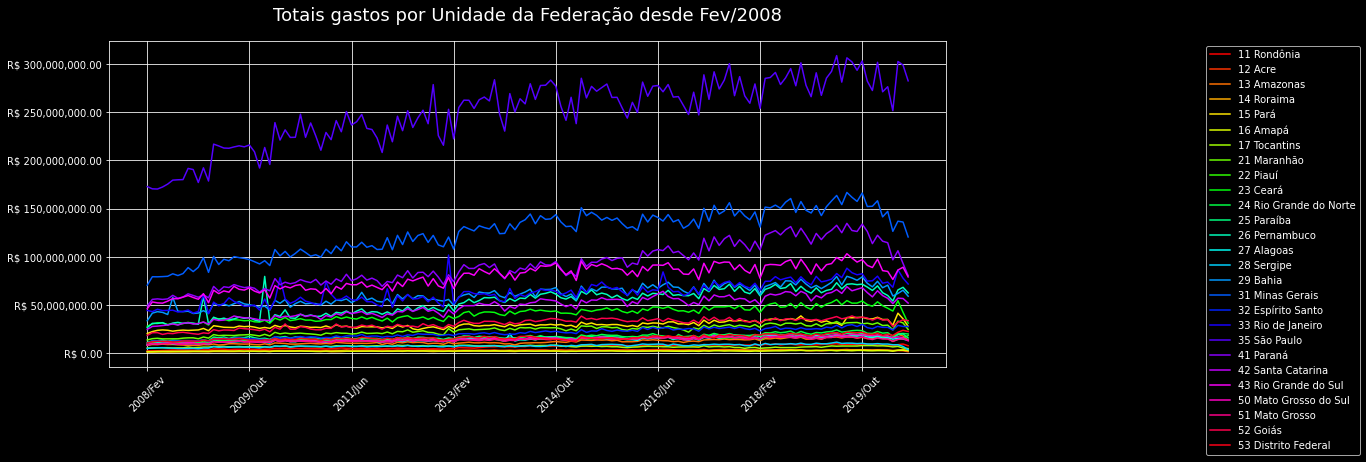

In [28]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = usaveis.T[6:].plot(figsize=(15,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Totais gastos por Unidade da Federação desde Fev/2008', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=45)


plt.show()

## Gerando 5 UFs aleatórias

In [29]:
import numpy as np

> Com a biblioteca numpy podemos selecionar 5 UFs de forma aleatória utilizando o df.sample(5)

In [30]:
np.random.seed(3456) # Definir a seed na execução vai garantir o mesmo resultado nos testes

usaveis.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,...,83188379.66,95149948.63,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,15835149.88,16543674.21,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,31409553.23,28947510.92,30985515.77,31705296.79,30703879.20,31165074.59,30889234.12,2975

> Se executarmos novamente o resultado será outro

In [31]:
usaveis.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,...,83188379.66,95149948.63,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487.88,11286787.17,10814729.24,11570718.38,10920760.16,13204085.81,11711475.20,12671896.78,12584046.80,11808910.05,12917152.45,12429678.06,12526681.04,12305360.94,...,15646601.91,18212081.17,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,10465088.93,10618079.70,10645917.52,11037940.55,11143375.71,10583049.66,10151738.46,12411956.66,10896197.27,13754374.44,12570578.13,12936419.98,12205840.71,12883412.78,12877691.95,12486616.77,12541516.67,12421929.89,11098207.01,12554360.19,11398067.83,13606085.88,12157142.10,13077016.55,12062273.73,11786099.56,12297891.70,11996938.27,12358950.30,11686383.33,...,15761679.42,16979464.75,15514183.16,15403020.27,15720599.30,15307387.92,15656346.10,15605461.66,15042889.08,15979472.64,13635293.55,16164249.27,16313578.41,17270223.67,16132887.17,16216685.50,16550617.02,15762154.38,16785244.63,15744012.68,15591161.82,16882315.66,15536428.06,16878130.00,16779468.57,17985160.84,17148165.73,17505527.28,17816404.11,17916788.90,19155508.31,17649092.71,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,94849

> Ou é possível fazer slices com as colunas

In [32]:
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

In [33]:
colunas_selecionadas = usaveis.columns[6:]
usaveis_a_partir_02_2008 = usaveis[colunas_selecionadas]

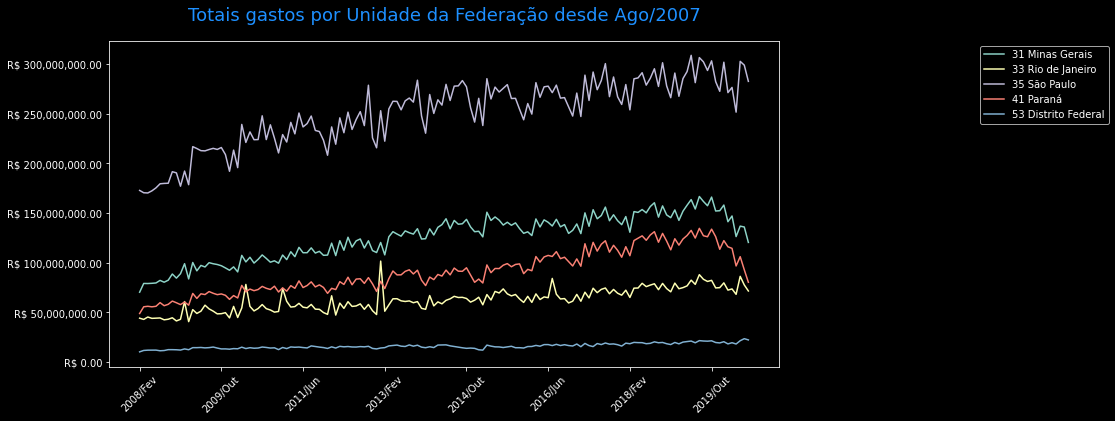

In [34]:
df = usaveis_a_partir_02_2008.T[['31 Minas Gerais', '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '53 Distrito Federal' ]]

ax = df.plot(figsize=(12,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Totais gastos por Unidade da Federação desde Ago/2007', fontsize=18, pad=20, color='dodgerblue')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=45)


plt.show()

## Pegando o último mês

In [35]:
coluna_mes_mais_recente = usaveis.columns[-1:]
usaveis_mes_recente = usaveis[coluna_mes_mais_recente]
usaveis_mes_recente

,2020/Jul
Unidade da Federação,
11 Rondônia,7407388.24
12 Acre,1163813.08
13 Amazonas,13358514.02
14 Roraima,2739498.41
15 Pará,27618727.51
16 Amapá,2155083.37
17 Tocantins,4489665.87
21 Maranhão,24374205.15
22 Piauí,18019214.49


## Desafio 3.02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [36]:
usaveis_com_regiao = usaveis

regioes = {1:'Norte', 2:'Nodeste', 4:'Sul',3:'Sudeste', 5:'Centro-Oeste'}

for index, row in usaveis_com_regiao.iterrows():
    usaveis_com_regiao.loc[index,'Região'] = regioes[int(index[0])]

In [37]:
usaveis_com_regiao.query('Região == "Sudeste"')

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,1905397

### Recriando a coluna 'Total'

In [38]:
usaveis_com_regiao['Total'] = usaveis_com_regiao.sum(axis=1)
usaveis_com_regiao.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.7

### Ordenando pelas UFs com maiores gastos

In [39]:
ordenados_total = usaveis_com_regiao.sort_values('Total', ascending=False) # Ordena de forma decrescente pela coluna total
ordenados_total = ordenados_total.drop('Total', axis=1) # Exclui a coluna total
ordenados_total.head() 

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,529286

## Desafio 3.03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

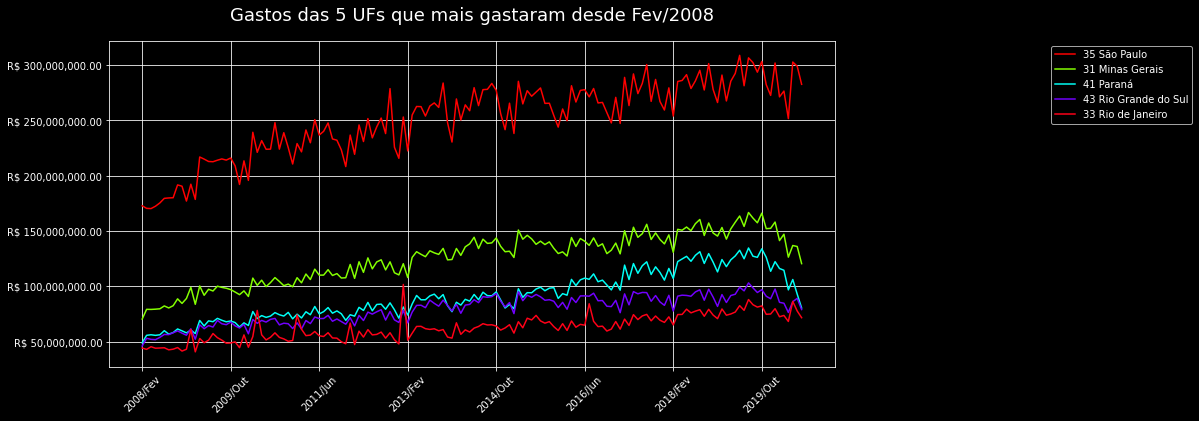

In [40]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = ordenados_total.head().T[6:-1].plot(figsize=(13,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Gastos das 5 UFs que mais gastaram desde Fev/2008', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=45)


plt.show()





## Desafio 3.04: Adicione o seu estado aos 5 estados plotados anteriormente

In [41]:
colunas_maiores = ordenados_total.head().T.columns.tolist()
colunas_maiores.append('53 Distrito Federal')
maiores_mais_distrito = ordenados_total.T[colunas_maiores]

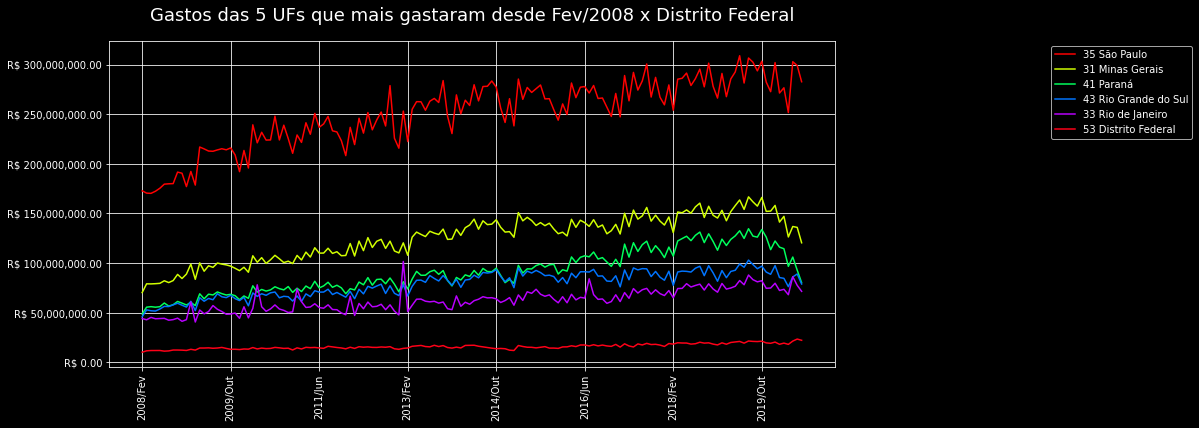

In [42]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = maiores_mais_distrito[6:-1].plot(figsize=(13,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Gastos das 5 UFs que mais gastaram desde Fev/2008 x Distrito Federal', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=90)


plt.show()

In [43]:
ordenados_total[['2012/Dez', '2013/Jan', '2013/Fev']]

,2012/Dez,2013/Jan,2013/Fev
Unidade da Federação,,,
35 São Paulo,215780410.93,253136778.93,222449529.20
31 Minas Gerais,110269165.40,120408181.68,107894647.44
41 Paraná,71086530.43,81233604.17,73976801.67
43 Rio Grande do Sul,67267196.31,78346443.99,66867562.81
33 Rio de Janeiro,47807776.69,101639542.67,51149155.06
29 Bahia,53818566.53,55573351.21,49629501.64
26 Pernambuco,43153098.13,50672652.05,43691252.74
42 Santa Catarina,36935634.65,44881453.22,40454271.52
23 Ceará,32662038.10,38349081.02,35710935.71


## Desafio 03.05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

> O proprósito deste estudo é avaliar o número de cados de dengue dos anos 2012 e 2013, por região e por Mês. Os dados consideram o mês 1º Sintoma(s) segundo Região de residência

---



In [44]:
dengue_2013 = 'https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/dengue_regiao_2013.csv'
dengue_2012 = 'https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/dengue_regiao_2012.csv'

# Fonte: http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=29878153

> Os dados na base do DataSus estão separadas por ano, e por isso vamos trabalhar com duas bases que serão concatenadas.

In [45]:
df_dengue_2012 = pd.read_csv(dengue_2012, delimiter=';', skiprows=6, skipfooter=16, thousands='.', decimal=',', encoding='ISO-8859-1')
df_dengue_2012 = df_dengue_2012.drop('Total', axis=1)
dicionario = {'Jan':'Jan/2012', 'Fev':'Fev/2012', 'Mar':'Mar/2012', 'Abr':'Abr/2012', 'Mai':'Mai/2012', 'Jun':'Jun/2012', 
              'Jul':'Jul/2012', 'Ago':'Ago/2012', 'Set':'Set/2012', 'Out':'Out/2012', 'Nov':'Nov/2012', 'Dez':'Dez/2012'}
df_dengue_2012 = df_dengue_2012.rename(columns = dicionario)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [46]:
df_dengue_2013 = pd.read_csv(dengue_2013, delimiter=';', skiprows=6, skipfooter=16, thousands='.', decimal=',', encoding='ISO-8859-1')
df_dengue_2013 = df_dengue_2013.drop(['Região de residência', 'Total'], axis=1)
dicionario_2 = {'Jan':'Jan/2013', 'Fev':'Fev/2013', 'Mar':'Mar/2013', 'Abr':'Abr/2013', 'Mai':'Mai/2013', 'Jun':'Jun/2013', 
              'Jul':'Jul/2013', 'Ago':'Ago/2013', 'Set':'Set/2013', 'Out':'Out/2013', 'Nov':'Nov/2013', 'Dez':'Dez/2013'}
df_dengue_2013 = df_dengue_2013.rename(columns = dicionario_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [47]:
dengue_12_13 = pd.concat([df_dengue_2012, df_dengue_2013.reindex(df_dengue_2012.index)], axis=1)
dengue_12_13.set_index('Região de residência', inplace=True)
dengue_12_13 = dengue_12_13.drop('Total')
dengue_12_13.head()

,Jan/2012,Fev/2012,Mar/2012,Abr/2012,Mai/2012,Jun/2012,Jul/2012,Ago/2012,Set/2012,Out/2012,Nov/2012,Dez/2012,Jan/2013,Fev/2013,Mar/2013,Abr/2013,Mai/2013,Jun/2013,Jul/2013,Ago/2013,Set/2013,Out/2013,Nov/2013,Dez/2013
Região de residência,,,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,6034,7324,6558,4490,3257,2104,1837,1939,1465,1516,2418,2639,9713,10645,9636,6681,3794,1990,1146,801,718,802,1417,1253
2 Região Nordeste,13204,18443,33400,45268,53513,20746,12695,7725,4008,2645,2786,2445,9483,16983,25938,25218,20827,14331,11327,8570,5035,3467,3559,2298
3 Região Sudeste,13168,20750,42956,61184,50445,23322,7929,4514,2914,3203,4658,11487,71550,136992,309042,262240,83113,21335,6438,3092,2414,2452,3050,3140
4 Região Sul,188,398,981,987,662,178,67,60,43,79,202,911,5916,12783,21801,17288,6091,1268,236,95,89,145,314,425
5 Região Centro-Oeste,4795,6269,8985,10098,9157,5325,3359,2221,1807,2553,4721,7681,55548,59296,58300,40595,21978,8920,3956,2277,1833,2295,3460,3493


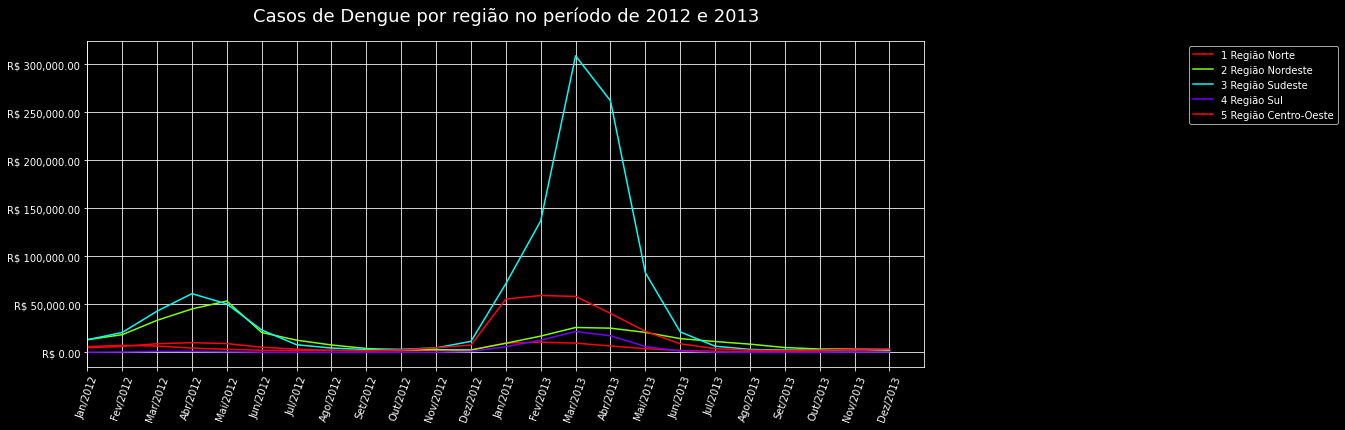

In [48]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
meses = dengue_12_13.columns.to_list()

ax = dengue_12_13.T.plot(figsize=(15,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Casos de Dengue por região no período de 2012 e 2013', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=70, )
plt.xlim(0, 24)
ax.set_xticks(range(0,24))
ax.set_xticklabels(dengue_12_13.columns)


plt.show()



> Realmente em Fev e Mar/2013 houve um pico de casos na região sudeste do Brasil

### Gastos nos hospitais no mesmo período de estudo dos casos de Dengue no Sudeste

In [49]:
sudeste = ordenados_total.query('Região == "Sudeste"')
sudeste

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,118

## Desafio 3.06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da *região*

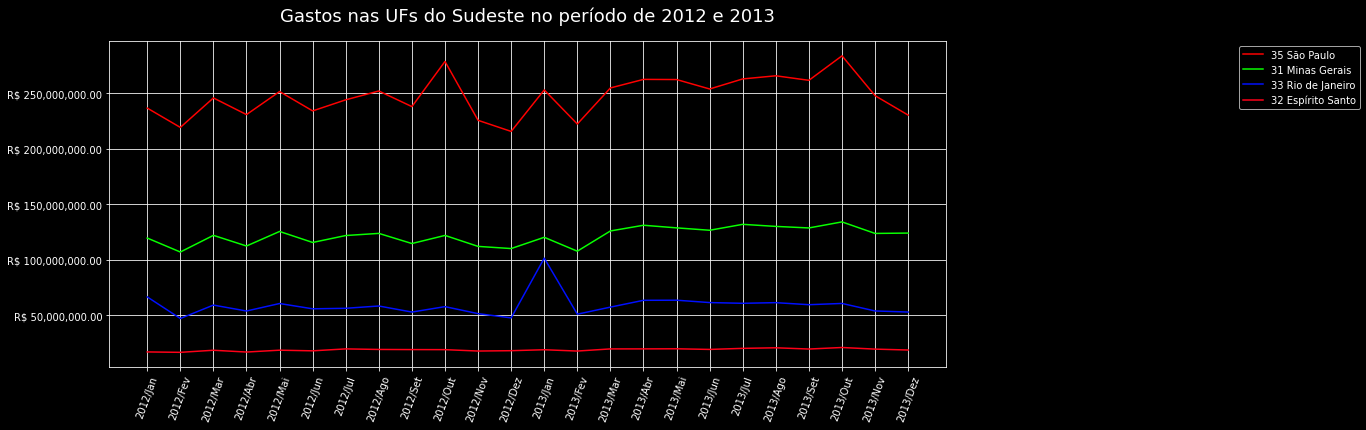

In [50]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = sudeste.T[53:77].plot(figsize=(15,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Gastos nas UFs do Sudeste no período de 2012 e 2013', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=70, )

ax.set_xticks(range(0,24))
ax.set_xticklabels(ordenados_total.columns[53:77])


plt.show()



> O pico de gastos com hospitais ocorreu em Janeiro de 2013 e teve comportamento semelhante das UFs da Região. O pico de casos de Dengue foi registrado em Março de 2013, logo não é possível relacionar os dois eventos.

## Desafio 3.07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [51]:
colunas_sudeste = sudeste.T.columns.tolist()
colunas_sudeste.append('53 Distrito Federal')
sudeste_mais_distrito = ordenados_total.T[colunas_sudeste]
sudeste_mais_distrito.T.head()


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,118

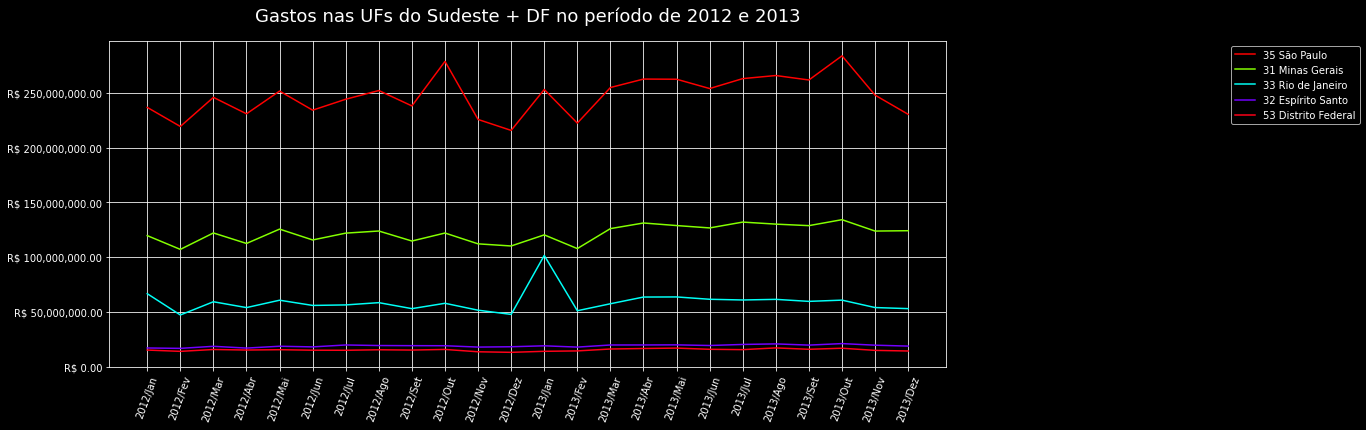

In [52]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = sudeste_mais_distrito[53:77].plot(figsize=(15,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Gastos nas UFs do Sudeste + DF no período de 2012 e 2013', fontsize=18, pad=20, color='white')

ax.legend(bbox_to_anchor=(1, 0, 0.5 , 1))

plt.xticks(rotation=70, )

ax.set_xticks(range(0,24))
ax.set_xticklabels(ordenados_total.columns[53:77])


plt.show()

> Os gastos no Distrito Federal ficaram abaixo do Espírito Santo, mas precisa ser levado em consideração o tamanho do Distrito Federal em relação aos outros estados. A comparação por valores absolutos parece não fazer muito sentido. Seria necessário uma comparação por habitantes encontrando um valor ponderado para uma análise mais precisa.

# Aula 04

Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

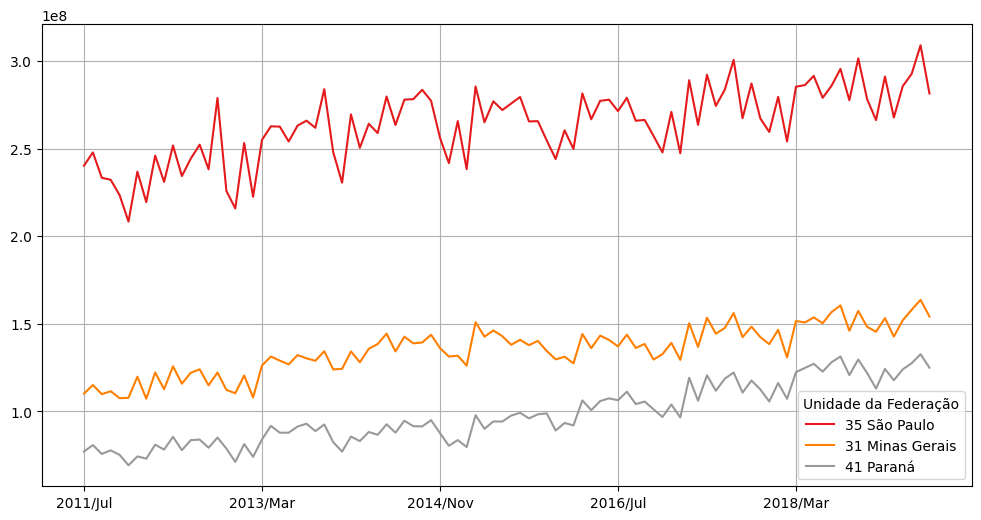

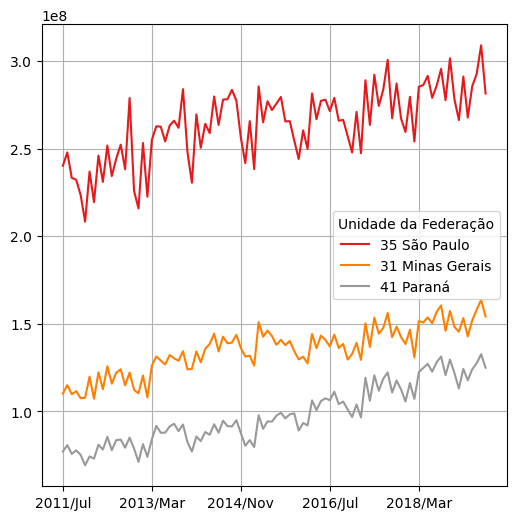

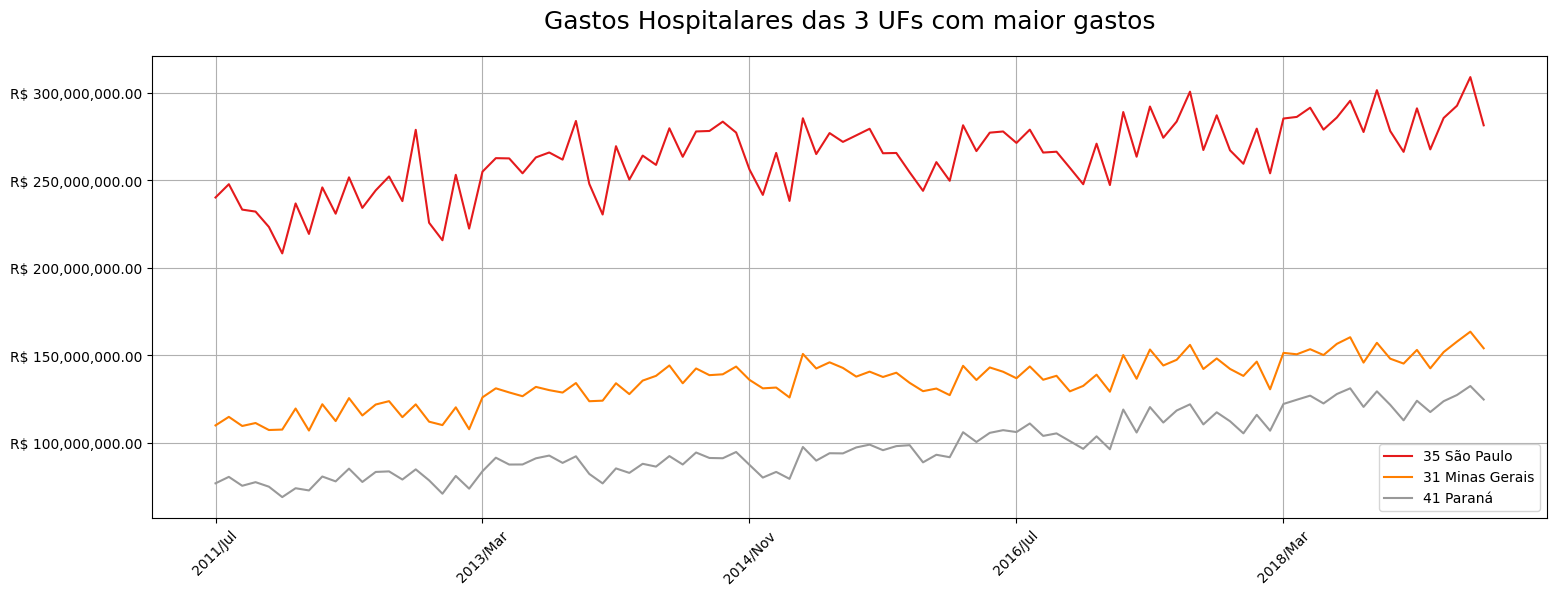

In [91]:
# style
plt.style.use('default')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
ax = ordenados_total.head(3).T[47:143].plot(figsize=(12,6), colormap=palette, grid=True)
ax = ordenados_total.head(3).T[47:143].plot(figsize=(6,6), colormap=palette, grid=True)
ax = ordenados_total.head(3).T[47:143].plot(figsize=(18,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

ax.xaxis
ax.set_title('Gastos Hospitalares das 3 UFs com maior gastos', fontsize=18, pad=20, color='black')



ax.legend(bbox_to_anchor=(0.5, 0, 0.5 , 1))

plt.xticks(rotation=45, )

plt.show()

> A escala do gráfico pode suavisar ou acentuar uma tendencia de crescimento.